In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
import collections
import itertools
from utils import *
from smoothing import *

In [189]:
def sort_spectra(eigs, evecs):
    idx = eigs.argsort()[::-1]   
    eigs = eigs[idx]
    evecs = evecs[:, idx]
    return eigs, evecs

In [209]:
# np.linalg.norm(evecs_true[:,1])
evecs_true[:, 0].sum()

5.570929466498434

In [185]:
N_dim = 32

p_star, orig, noise, X = generate_p_star(N=N_dim,a=1.4,symmetric=True,normalized=True)

eigs_true, evecs_true = np.linalg.eig(p_star)
idx = eigs_true.argsort()[::-1]   
eigs_true = eigs_true[idx]
evecs_true = evecs_true[:,idx]

pmi_star = get_pmi_matrix(p_star,ppmi=True)

eigs_true_pmi, evecs_true_pmi = np.linalg.eig(pmi_star)
idx = eigs_true_pmi.argsort()[::-1]   
eigs_true_pmi = eigs_true_pmi[idx]
evecs_true_pmi = evecs_true_pmi[:, idx]


In [ ]:
# eig2/eig1 experiment for importance sampling

num_samples = [10000,50000,100000,200000,500000]
alphas = [0.25,0.5,0.75,1]

results = {}

for n in num_samples:

    print(n)

    results[n] = {}

    for alpha in alphas:

        results[n][alpha] = []

        for _ in range(50):

            samples = sample_from_2d(p_star,n,return_p_hat=False)
            eigs,evecs = np.linalg.eig(glove_importance_sampling(samples,alpha=alpha))
            eigs = sorted(np.abs(eigs))[::-1]
            eigs = eigs/eigs[0]

            results[n][alpha].append(eigs)

/home/bingbin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


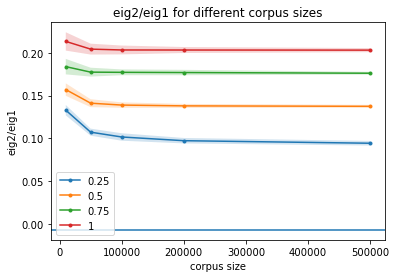

In [81]:
# plot eig1/eig2
for alpha in alphas:
    means = np.mean(np.array([results[n][alpha] for n in num_samples])[:,:,1],axis=1)
    std = np.std(np.array([results[n][alpha] for n in num_samples])[:,:,1],axis=1)

    plt.plot(num_samples,means,marker=".",label=alpha)
    plt.fill_between(num_samples,means-std,means+std,alpha=0.2)

eigs_true = sorted(eigs_true)
plt.axhline(y=(eigs_true/eigs_true[0])[1])

plt.title("eig2/eig1 for different corpus sizes")
plt.xlabel("corpus size")
plt.ylabel("eig2/eig1")

plt.legend()
plt.show()

In [215]:
num_samples = [10000,50000,100000, 200000, 500000,
               1000000, 2000000]


methods = ['mle',
            'gt',
            'svd',
            'interp',
            'add_k',
            'kneser_ney',
            'importance_sampling_glove',
            'eigenvalue_weighting',
            'cds_pmi',
            'dirichlet_pmi'
          ]

# results = {}
for n in num_samples:

    print(f"Number of samples {n}")

    if n not in results:
        results[n] = {}
    else:
        continue

    for method in methods:

        results[n][method] = {'eigs' : [], 'evecs' : [], 'mat' : []}

    for _ in range(50):

        samples = sample_from_2d(p_star,n,return_p_hat=False)

        # MLE estimate 
        mle = MLE_estimator(samples)
        eigs,evecs = np.linalg.eig(mle)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['mle']['eigs'].append(eigs[:2])
        results[n]['mle']['evecs'].append(evecs[:,:2])
        results[n]['mle']['mat'].append(mle )
        
        # tmp: 
        continue

        # Good Turing Estimator
        gt = good_turing_estimator(samples)
        eigs,evecs = np.linalg.eig(gt)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['gt']['eigs'].append(eigs[:2])
        results[n]['gt']['evecs'].append(evecs[:,:2])
        results[n]['gt']['mat'].append(gt )

        # SVD reconstruction
        svd = svd_smoothing(samples)
        eigs,evecs = np.linalg.eig(svd)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['svd']['eigs'].append(eigs[:2])
        results[n]['svd']['evecs'].append(evecs[:,:2])
        results[n]['svd']['mat'].append(svd )

        # Interpolation with uniform prior
        interp = interpolation_smoothing(samples,0.95)
        eigs,evecs = np.linalg.eig(interp)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['interp']['eigs'].append(eigs[:2])
        results[n]['interp']['evecs'].append(evecs[:,:2])
        results[n]['interp']['mat'].append(interp )

        # Add-k smoothing
        add_k = add_k_smoothing(samples,k=1)
        eigs,evecs = np.linalg.eig(add_k)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['add_k']['eigs'].append(eigs[:2])
        results[n]['add_k']['evecs'].append(evecs[:,:2])
        results[n]['add_k']['mat'].append(add_k )

        # kneser ney smoothing
        kneser_ney = kneser_ney_smoothing(samples)
        eigs,evecs = np.linalg.eig(kneser_ney)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['kneser_ney']['eigs'].append(eigs[:2])
        results[n]['kneser_ney']['evecs'].append(evecs[:,:2])
        results[n]['kneser_ney']['mat'].append(kneser_ney )

        # importance sampling (from GloVe)
        importance_sampling_glove = glove_importance_sampling(samples)
        eigs,evecs = np.linalg.eig(importance_sampling_glove)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['importance_sampling_glove']['eigs'].append(eigs[:2])
        results[n]['importance_sampling_glove']['evecs'].append(evecs[:,:2])
        results[n]['importance_sampling_glove']['mat'].append(importance_sampling_glove )

        # eigenvalue weighting 
        eigenvalue_weighting_ = eigenvalue_weighting(samples,p=0.5)
        eigs,evecs = np.linalg.eig(eigenvalue_weighting_)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['eigenvalue_weighting']['eigs'].append(eigs[:2])
        results[n]['eigenvalue_weighting']['evecs'].append(evecs[:,:2])
        results[n]['eigenvalue_weighting']['mat'].append(eigenvalue_weighting_)

        # Estimates for PMI Matrix

        # cds smoothing
        cds_pmi = cds_smoothing(samples)
        cds_ppmi = convert_to_ppmi(cds_pmi)
        eigs,evecs = np.linalg.eig(cds_ppmi)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['cds_pmi']['eigs'].append(eigs[:2])
        results[n]['cds_pmi']['evecs'].append(evecs[:,:2])
        results[n]['cds_pmi']['mat'].append(cds_ppmi)

        # dirichlet smoothing
        dirichlet_pmi = dirichlet_smoothing(samples)
        dirichlet_ppmi = convert_to_ppmi(dirichlet_pmi)
        eigs,evecs = np.linalg.eig(dirichlet_ppmi)
        eigs, evecs = sort_spectra(eigs, evecs)
        results[n]['dirichlet_pmi']['eigs'].append(eigs[:2])
        results[n]['dirichlet_pmi']['evecs'].append(evecs[:,:2])
        results[n]['dirichlet_pmi']['mat'].append(dirichlet_ppmi)
        

Number of samples 10000
Number of samples 50000
Number of samples 100000
Number of samples 200000
Number of samples 500000
Number of samples 1000000
Number of samples 2000000


/home/bingbin/replearning/smoothing.py:118: RuntimeWarning: divide by zero encountered in log
  


In [87]:
import pandas as pd
df = pd.DataFrame(index=methods,columns=num_samples)

In [88]:
for method in methods:
    for n in num_samples:

        if 'pmi' not in method:
            df.loc[method][n] = (np.mean(np.abs(np.array(results[n][method]['eigs']) -  eigs_true[:2])[:,0]),\
                np.std(np.abs(np.array(results[n][method]['eigs']) -  eigs_true[:2])[:,0]))
        # else:
        #     df.loc[method][n] = (np.mean(np.abs(np.array(results[n][method]['eigs']) -  eigs_true[:2])[:,0]),\
        #         np.std(np.abs(np.array(results[n][method]['eigs']) -  eigs_true_pmi[:2])[:,0]),6)

In [ ]:
# Top eig error
df

In [89]:
import pandas as pd

# top evec error, l2
df2 = pd.DataFrame(index=methods,columns=num_samples)

In [90]:
for method in methods:
    for n in num_samples:

        if 'pmi' not in method:
            df2.loc[method][n] = (
                np.mean(np.linalg.norm((np.array(results[n][method]['evecs']) - evecs_true[:,:2])[:,:,0],axis=1)) , \
                    np.std(np.linalg.norm((np.array(results[n][method]['evecs']) - evecs_true[:,:2])[:,:,0],axis=1))
            )
            #  np.mean(np.abs(np.array(results[n][method]['evecs']) -  eigs_true_pmi[:2])[:,0])
        # else:
        #     df2.loc[method][n] = np.mean(np.abs(np.array(results[n][method]['evecs']) -  eigs_true[:2])[:,0])

In [92]:
# top evec error, l-inf
df3 = pd.DataFrame(index=methods,columns=num_samples)

In [93]:
for method in methods:

    for n in num_samples:

        df3.loc[method][n] = (
            np.mean(np.linalg.norm((np.array(results[n][method]['evecs']) - evecs_true[:,:2])[:,:,0],np.inf,axis=1))
            ,
            np.round(np.std(np.linalg.norm((np.array(results[n][method]['evecs']) - evecs_true[:,:2])[:,:,0],np.inf,axis=1)),6)
        )

In [95]:
methods

['mle',
 'gt',
 'svd',
 'interp',
 'add_k',
 'kneser_ney',
 'importance_sampling_glove',
 'eigenvalue_weighting',
 'cds_pmi',
 'dirichlet_pmi']

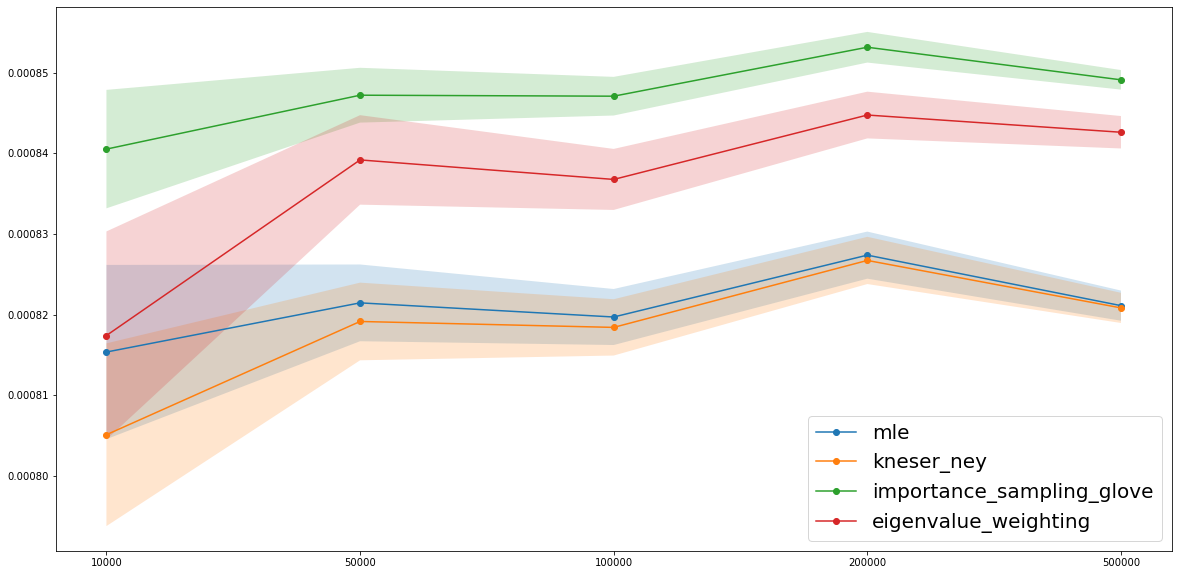

In [187]:
"""
Check eigenvalues
"""
x = range(len(num_samples))
CHECK_PMI = 0
for method in methods: # ['mle', 'kneser_ney', 'importance_sampling_glove']:

    if 'pmi' in method:
        if not CHECK_PMI: continue
        eig_true = eigs_true_pmi[:2]
        # data = [(n,np.abs(np.array(results[n][method]['eigs']) -  eigs_true_pmi[:2])[:,0]) for n in num_samples]
    else:
        if CHECK_PMI: continue
        if method in ['interp', 'gt', 'add_k', 'svd']:
            # skip methods with really bad performance
            continue
        eig_true = eigs_true[:2]

    data = [(n, np.abs(np.array(results[n][method]['eigs']) -  eig_true)[:,0]) for n in num_samples]

    # plt.boxplot(y_values, positions=range(len(num_samples)), widths=0.2,meanline=True,showmeans=True)
    # plt.plot(range(len(num_samples)), [np.mean(i) for i in y_values],label=method)
    
    y_values = [y for _,y in data]
    n_trials = len(y_values[0])
    means = np.array([y.mean() for y in y_values])
    stds = np.array([y.std() for y in y_values]) / (n_trials**0.5)
    plt.plot(x, means, marker='o', label=method)
    plt.fill_between(x, means+stds, means-stds, alpha=0.2)


plt.rcParams['figure.figsize'] = (20,10)
plt.xticks(range(len(num_samples)), num_samples)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize="20")
# plt.ylim(0,2)
plt.show()

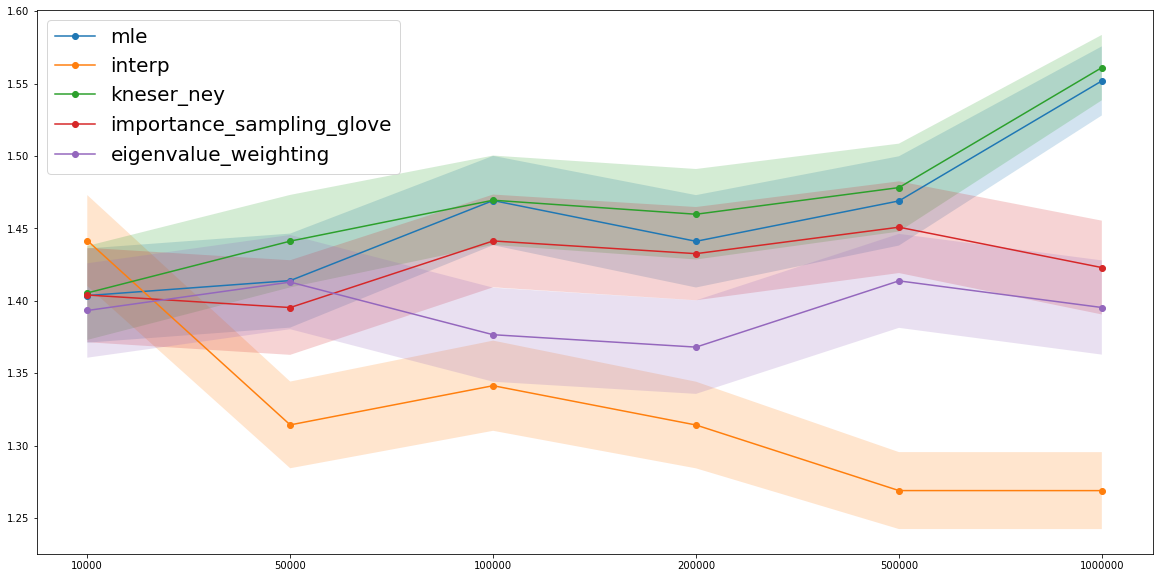

In [212]:
"""
Check eigenvectors
"""
x = range(len(num_samples))
CHECK_PMI = 0
LOSS_TYPE = 'l2'
for method in methods: # ['mle', 'kneser_ney', 'importance_sampling_glove']:

    if 'pmi' in method:
        if not CHECK_PMI: continue
        evec_true = evecs_true_pmi[0]
        # data = [(n,np.abs(np.array(results[n][method]['eigs']) -  eigs_true_pmi[:2])[:,0]) for n in num_samples]
    else:
        if CHECK_PMI: continue
        if method in ['gt', 'add_k', 'svd']:
            # skip methods with really bad performance
            continue
        evec_true = evecs_true[0]
    if LOSS_TYPE == 'l2':
        data = [(n, np.linalg.norm(np.array(results[n][method]['evecs'])[:,:,0] -  evec_true, axis=1))
                    for n in num_samples]
    elif LOSS_TYPE == 'l_inf':
        data = [(n, np.abs(np.array(results[n][method]['evecs'])[:,:,0] -  evec_true).max(1))
                    for n in num_samples]

    # plt.boxplot(y_values, positions=range(len(num_samples)), widths=0.2,meanline=True,showmeans=True)
    # plt.plot(range(len(num_samples)), [np.mean(i) for i in y_values],label=method)
    
    y_values = [y for _,y in data]
    n_trials = len(y_values[0])
    means = np.array([y.mean() for y in y_values])
    stds = np.array([y.std() for y in y_values]) / (n_trials**0.5)
    plt.plot(x, means, marker='o', label=method)
    plt.fill_between(x, means+stds, means-stds, alpha=0.2)


plt.rcParams['figure.figsize'] = (20,10)
plt.xticks(range(len(num_samples)), num_samples)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize="20")
# plt.ylim(0,2)
plt.show()

In [205]:
np.linalg.norm(np.array(results[n][method]['evecs'])[:,:,0] -  evec_true, axis=1)

array([1.17578701, 1.61965231, 1.61767378, 1.61886214, 1.61818273,
       1.61679542, 1.61720599, 1.17643739, 1.17577801, 1.61793307,
       1.17625148, 1.6176894 , 1.61838591, 1.6193562 , 1.17772725,
       1.61792709, 1.61704979, 1.61792439, 1.61763649, 1.17687432,
       1.61864641, 1.17562804, 1.1745399 , 1.61744943, 1.17473863,
       1.61970992, 1.1760263 , 1.61726223, 1.17580696, 1.61807131,
       1.6183289 , 1.61879113, 1.17672485, 1.17535138, 1.61806249,
       1.61933206, 1.17433569, 1.61787089, 1.17588515, 1.61809451,
       1.17506887, 1.1740862 , 1.17541865, 1.17578667, 1.17559483,
       1.61768628, 1.61866258, 1.17556196, 1.61814596, 1.61821287])

In [147]:
np.array(results[n][method]['evecs'])[:,:,0].shape

(50, 32, 1)

In [150]:
(np.array(results[n][method]['evecs'])[:,:,0] -  evec_true).shape

(50, 32)

In [142]:
evecs_true.shape

(32, 32)